In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for criterio in ['gini', 'entropy']:
        for estimadores in [1,10,20,50,100,200]:
            for profundidad in [2,3,4,5,6,7,8,9,10]: 
                kf = KFold(n_splits=5)
                metricas_de_la_combinacion = []
                for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                    random_forest = RandomForestClassifier(max_depth=profundidad,n_estimators=estimadores,criterion=criterio)
                    random_forest.fit(X.iloc[train_index], y.iloc[train_index])
                    y_pred = random_forest.predict(X.iloc[test_index])
                    metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                    print(roc_auc_score(y.iloc[test_index], y_pred))
                print(f"Promedio de la combinacion {np.mean(metricas_de_la_combinacion)}")
                metrics.append((profundidad,estimadores,criterio,np.mean(metricas_de_la_combinacion)))
    df_metrics = pd.DataFrame(metrics, columns=['profundidad','estimadores','criterio','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

In [8]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

0.5903334924629714
0.5
0.5
0.5
0.6823646172638437
Promedio de la combinacion 0.5545396219453631
0.6052658005688498
0.7090436262190524
0.5915072374824834
0.611056824609561
0.6333122964169381
Promedio de la combinacion 0.630037157059377
0.7361729090288303
0.7183531800400327
0.6840114588432126
0.6605433804803893
0.7226699918566775
Promedio de la combinacion 0.7043501840498285
0.6396182974364679
0.6919554943147863
0.6383116274114699
0.7189064215451308
0.6993414087947882
Promedio de la combinacion 0.6776266499005287
0.6535842406040128
0.733341684347329
0.7563943485212133
0.6737885590427354
0.7126089169381107
Promedio de la combinacion 0.7059435498906803
0.6910890106307868
0.7055749542651499
0.724849684957257
0.7336260694397992
0.7348727605863192
Promedio de la combinacion 0.7180024959758624
0.6864477938915848
0.7368628111078924
0.6509145078357117
0.753660742587966
0.7240289087947882
Promedio de la combinacion 0.7103829528435887
0.7175035649673784
0.7100696265791898
0.7319180008239148
0.6788

0.7185482076977573
0.7345388843648208
Promedio de la combinacion 0.7212071038594388
0.7498296694892865
0.7200781863685355
0.6937982776874241
0.7390353682551377
0.7204662052117264
Promedio de la combinacion 0.7246415414024221
0.7141772920461446
0.7346015130993483
0.7628968895325733
0.7203038280203631
0.7285484527687296
Promedio de la combinacion 0.7321055950934319
0.5858492810584747
0.5392688165308323
0.5183989670755326
0.5435235604272981
0.5003125
Promedio de la combinacion 0.5374706250184276
0.5852996658277599
0.6140268328518452
0.6760078161350742
0.6525265314573152
0.6593953583061889
Promedio de la combinacion 0.6374512409156367
0.6827449399092498
0.7095626939327273
0.6832880943253803
0.7124438019114671
0.7056076954397394
Promedio de la combinacion 0.6987294451037128
0.716735339602732
0.7112745213172681
0.7379462119100323
0.7350704842578565
0.7279092019543975
Promedio de la combinacion 0.7257871518084572
0.7181957016458331
0.719761630744258
0.724325405027546
0.7307087265465616
0.7208

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.87      0.95      0.91      6159
   Tiene Alto Valor Adquisitivo       0.78      0.55      0.65      1982

                       accuracy                           0.85      8141
                      macro avg       0.83      0.75      0.78      8141
                   weighted avg       0.85      0.85      0.84      8141



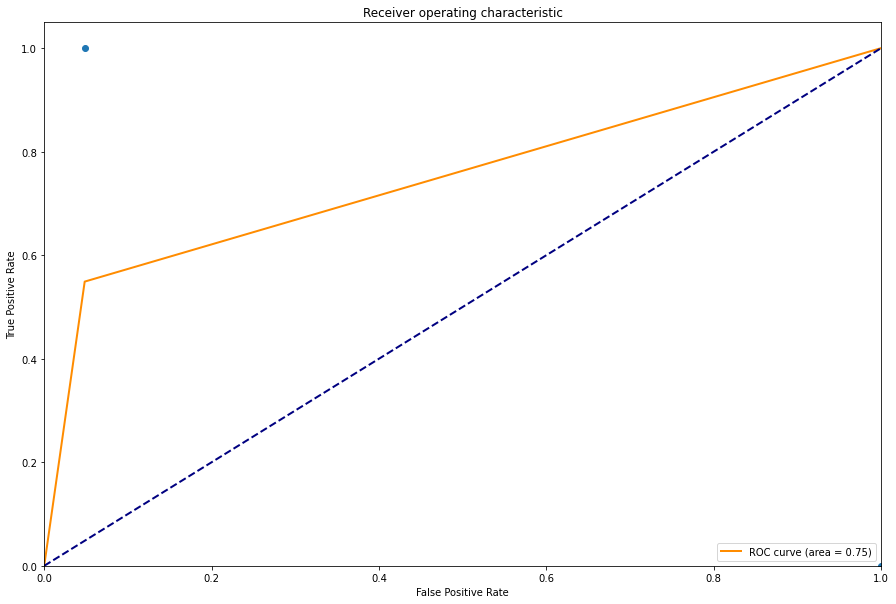

0.7502779930889616

In [9]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
random_forest = RandomForestClassifier(max_depth = parametros_random_forest[0], n_estimators = parametros_random_forest[1], 
                                       criterion = parametros_random_forest[2])
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)